***
 # Clustering
***
***

Perform Principal component analysis and perform clustering using first 
3 principal component scores (both heirarchial and k mean clustering(scree plot or elbow curve) and obtain 
optimum number of clusters and check whether we have obtained same number of clusters with the original data 
(class column we have ignored at the begining who shows it has 3 clusters)

# Step 1: Import Libraries required

In [1]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Step 2: Dataset Loading & Feature understanding.

In [2]:
dataset = pd.read_csv('wine.csv')
dataset.head()

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735

In [3]:
dataset.keys()

Index(['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')

### Understanding wine fetures

1. Type : Type of wine


2. Alchohol :
Alchohol % in wine (Wine is an alcoholic drink typically made from fermented grape juice.)


3. <p align="justify"> Malic : Type of acid. Malic acid is one of two major naturally occurring acids in wine grapes (and inother fruit). This acid presents itself as a pleasant, refreshing juicy taste, similar to biting into an apple. Malic acid is usually left in a wine to make it refreshing and tart. However, when there is too much malic acid, it is converted to lactic acid through malolactic fermentation, so that the wine will be smooth, full-bodied and complex.</p>


4. Ash : 
    * On the average about 2.5 g/L of ash are found in wine.
    * Ash being defined as the inorganic matter that remains after evaporation and incineration.
    * Cations - most of the ash falls into this class and includes potassium, sodium, calcium, magnesium, iron, copper, lead, arsenic, etc.
    
    (Note: Cation meaning: a positively charged ion, i.e. one that would be attracted to the cathode in electrolysis.)
    
    
5. Alcalinity : Alkalinity of ash measures the basicity (alkalinity) of the ash obtained from a sample. This is accomplished by adding acid to the ash until the solution is neutralized. Basically Wine acidity is considered. Not found much information on Alcanity of Wine..Sorry!!


6. Magnesium (mg/litre) :
    * Magnesium is one of the trace element in wine. 
    * Generally, elevation of magnesium resulted in a well- balanced wine with respect to flavour. Maintenance of high magnesiumcalcium levels will, therefore, not only act as a stimulus to ethanolic fermentation, but may also result in a more palatable wine. 
    
    
7. Phenols (mg/litre) : (Related to color & taste)
    * Phenols are responsible for the red color in red wine. It is an organic compound released by plants and animals as a part of their defense mechanisms with a central cyclic benzene ring and varying number of hydroxyl groups as substituents. So, the more stressed the vines are, the more phenols they will produced. Phenols not only affect the color in red wines, but also act as preservatives and affect the taste of wine. Phenols used in winemaking are subdivided into two different groups: non-flavanoids and flavanoids.
    
    
8. Flavonoids : Flavionoids include the anthocyanins and tannins which contribute to the color and mouthfeel of the wine.
    * Wine flavonoids develop from the seeds and skins of the grapes themselves. They are the largest type of antioxidant found in red wines and are the clear MVP behind their range of health benefits. The healthiest red wines have high amounts of the antioxidant flavonoid resveratrol. (fyi.)
    
    
9. Nonflavanoids : 
    * Nonflavanoids are the primary contributor to the color white wine. Compared to color in red wine, the chemical nature of color in white wine is not very well understood. The majority of the phenols in white wine are nonflavanoid hydroxycinamates. These include caftaric acid, coumaric acid and ferulic acid.
    
    
10. Proanthocyanins : Proanthocyanidins are the principal polyphenols in red wine that are under research to assess risk of coronary heart disease and lower overall mortality. With tannins, they also influence the aroma, flavor, mouth-feel and astringency of red wines.


11. Color : Wine color difference from standard set. It is calculated by color difference equation.
    (https://sensing.konicaminolta.us/us/blog/identifying-color-differences-using-l-a-b-or-l-c-h-coordinates/)
    
    
12. Hue : Color shade. a simplistic measure of the appearance of the color – a ratio of the absorbance in the violet to the absorbance in the green. Wine color hue = A420/ A520. CIE L*a*b* is one of the most widely used international scales for color


13. Dilution : Dilution Factor. The dilution increases the volume of wine 


14. Proline is typically the most abundant amino acid present in grape juice and wine. The amount present is influenced by viticultural and winemaking factors and can be of diagnostic importance.

# Step 3: Data preprocessiing 

In [4]:
# importing dataset

dataset = pd.read_csv('wine.csv')

In [5]:
# first 5 rows of dataset

dataset.head()

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735

In [6]:
# checking shape of dataset. i.e no. of rows and columns

dataset.shape

(178, 14)

In [7]:
# Checking dataset column names & numbers.

print(len(dataset.keys()))
dataset.keys()

14


Index(['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [9]:
# checking for null values..

dataset.isna().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [10]:
# checking unique values form dependent variable 'Type' column

dataset.Type.unique()

array([1, 2, 3], dtype=int64)

# Step 4:  Exploratory Data Analysis

In [11]:
# checking numerical data information..

dataset.describe().transpose()

count        mean         std     min       25%      50%  \
Type             178.0    1.938202    0.775035    1.00    1.0000    2.000   
Alcohol          178.0   13.000618    0.811827   11.03   12.3625   13.050   
Malic            178.0    2.336348    1.117146    0.74    1.6025    1.865   
Ash              178.0    2.366517    0.274344    1.36    2.2100    2.360   
Alcalinity       178.0   19.494944    3.339564   10.60   17.2000   19.500   
Magnesium        178.0   99.741573   14.282484   70.00   88.0000   98.000   
Phenols          178.0    2.295112    0.625851    0.98    1.7425    2.355   
Flavanoids       178.0    2.029270    0.998859    0.34    1.2050    2.135   
Nonflavanoids    178.0    0.361854    0.124453    0.13    0.2700    0.340   
Proanthocyanins  178.0    1.590899    0.572359    0.41    1.2500    1.555   
Color            178.0    5.058090    2.318286    1.28    3.2200    4.690   
Hue              178.0    0.957449    0.228572    0.48    0.7825    0.965   
Dilution         178.0    2.611685    0.709990    1.27    1.9375    2.780   
Proline          178.0  746.893258  314.907474  278.00  500.5000  673.500   

                      75%      max  
Type               3.0000     3.00  
Alcohol           13.6775    14.83  
Malic              3.0825     5.80  
Ash                2.5575     3.23  
Alcalinity        21.5000    30.00  
Magnesium        107.0000   162.00  
Phenols            2.8000     3.88  
Flavanoids         2.8750     5.08  
Nonflavanoids      0.4375     0.66  
Proanthocyanins    1.9500     3.58  
Color              6.2000    13.00  
Hue                1.1200     1.71  
Dilution           3.1700     4.00  
Proline          985.0000  1680.00

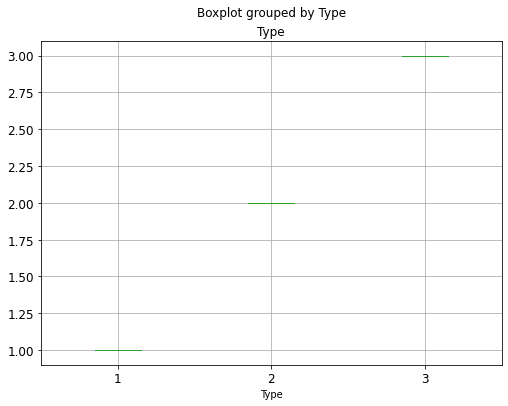

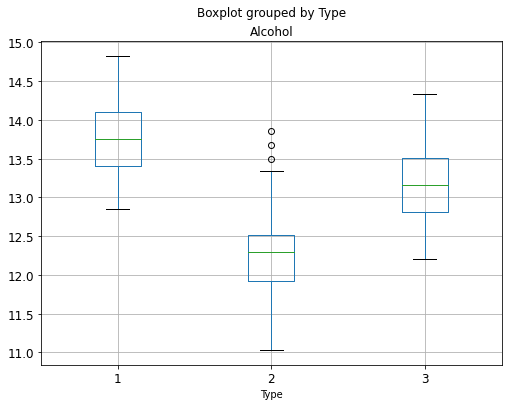

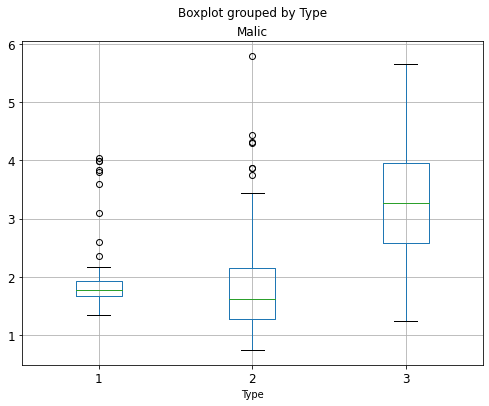

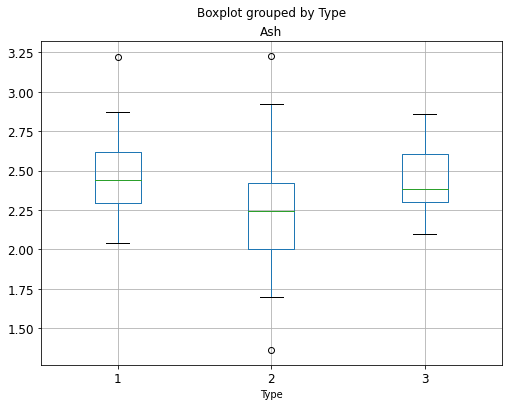

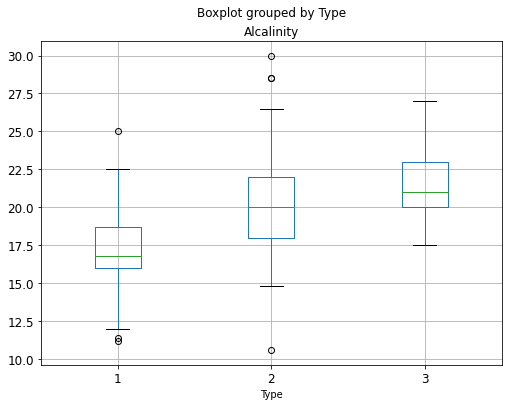

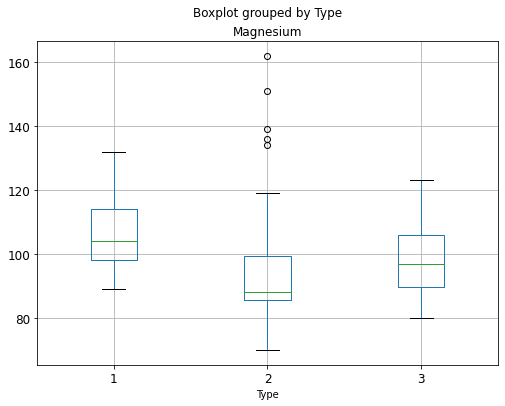

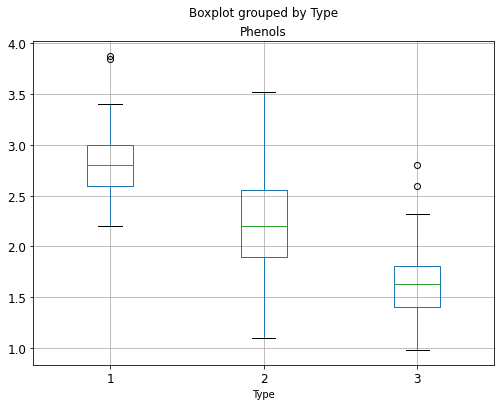

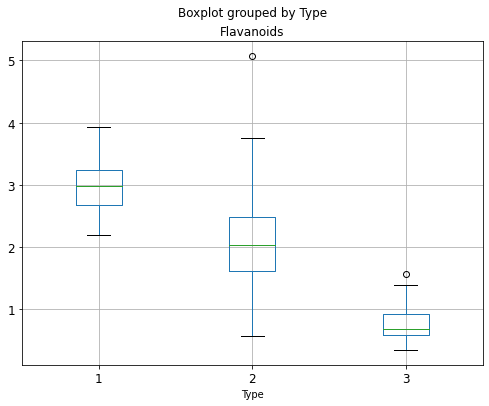

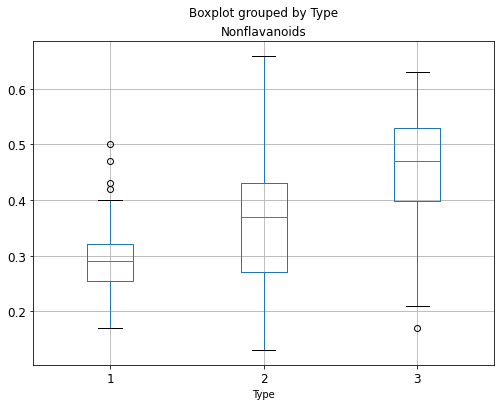

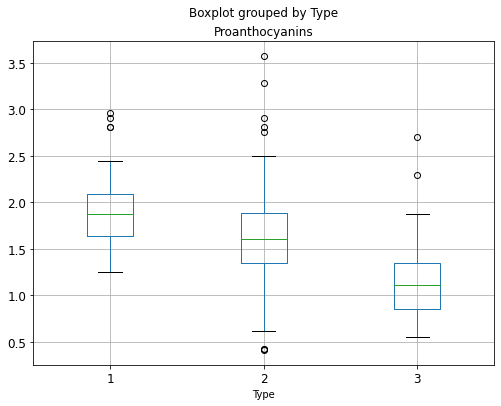

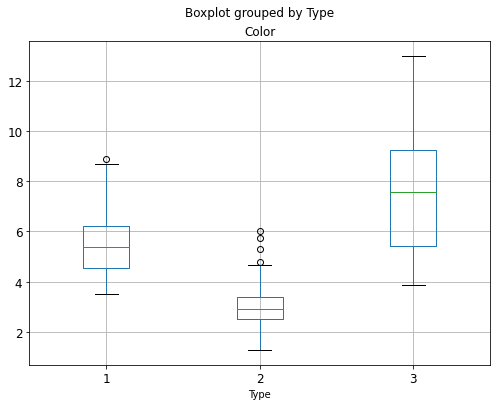

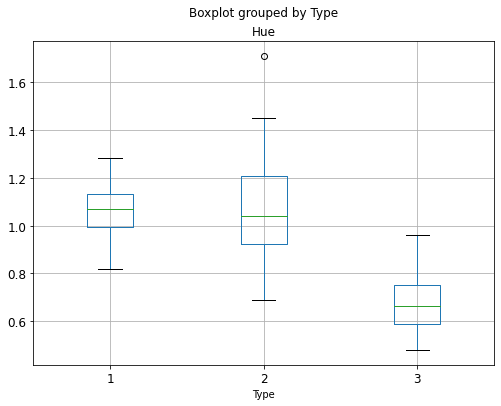

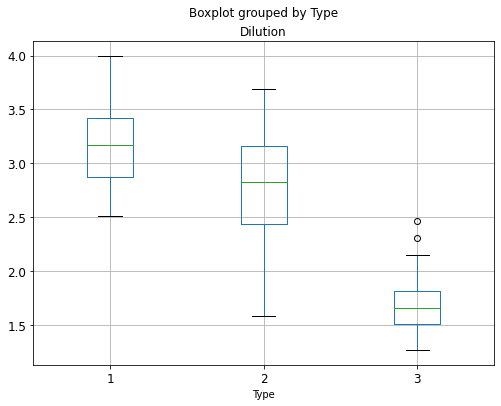

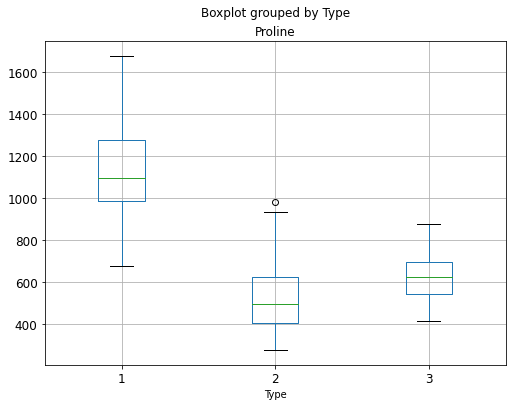

In [12]:
# plotting boxplots..

for i in dataset.keys():
    boxplot = dataset.boxplot(by ='Type', column=[i], fontsize=12, figsize=(8,6))

<Figure size 432x288 with 0 Axes>

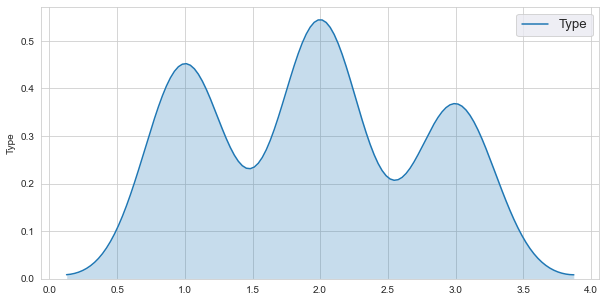

<Figure size 432x288 with 0 Axes>

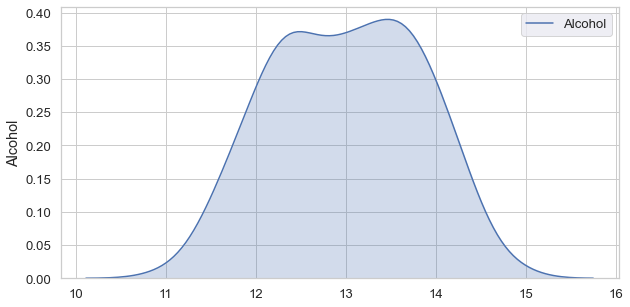

<Figure size 432x288 with 0 Axes>

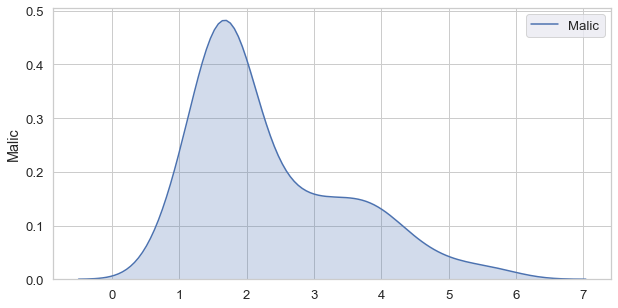

<Figure size 432x288 with 0 Axes>

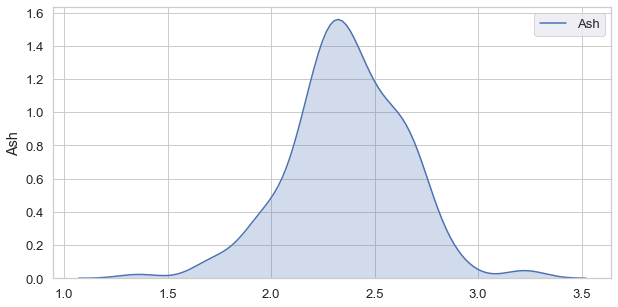

<Figure size 432x288 with 0 Axes>

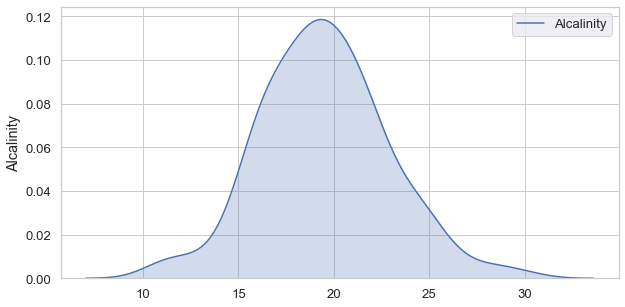

<Figure size 432x288 with 0 Axes>

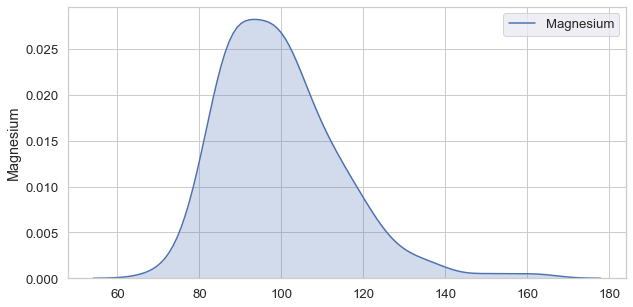

<Figure size 432x288 with 0 Axes>

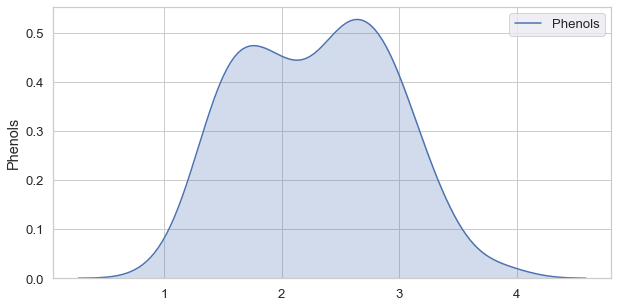

<Figure size 432x288 with 0 Axes>

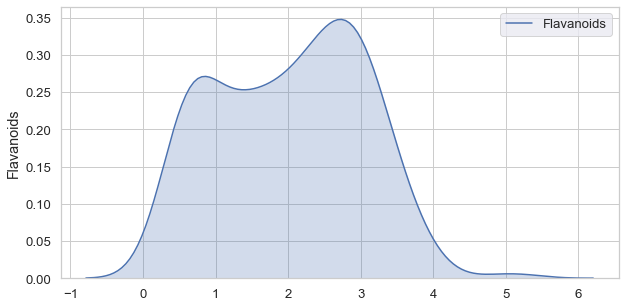

<Figure size 432x288 with 0 Axes>

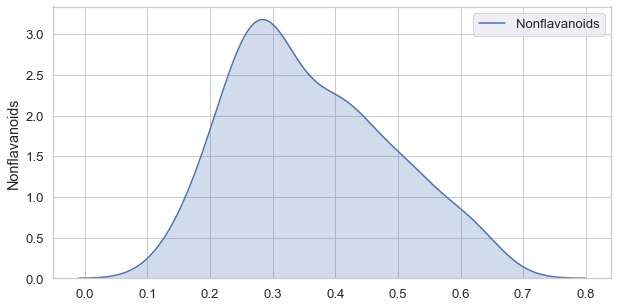

<Figure size 432x288 with 0 Axes>

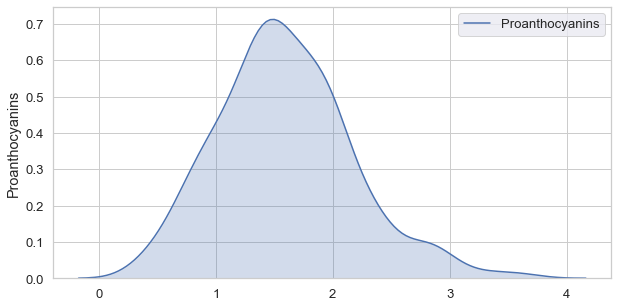

<Figure size 432x288 with 0 Axes>

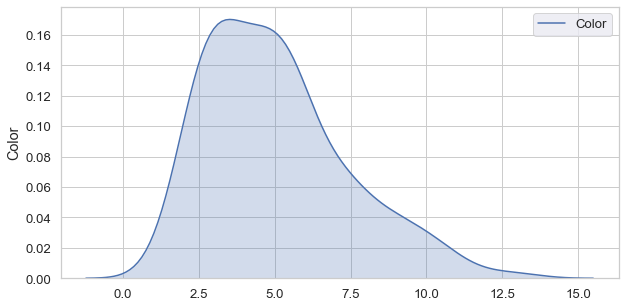

<Figure size 432x288 with 0 Axes>

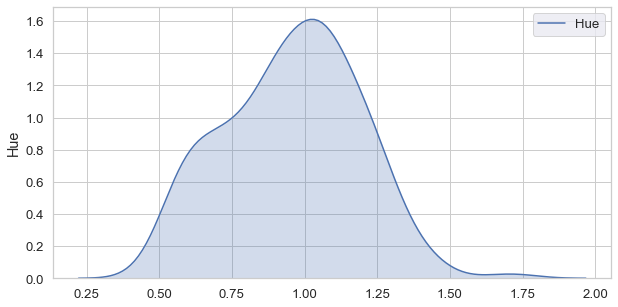

<Figure size 432x288 with 0 Axes>

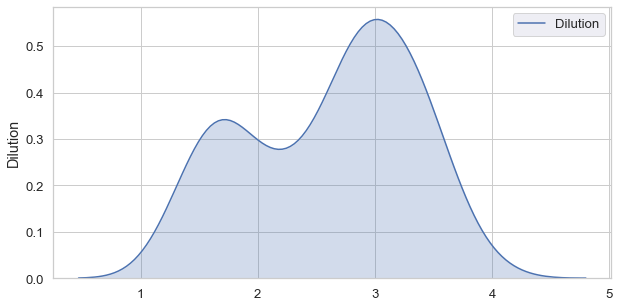

<Figure size 432x288 with 0 Axes>

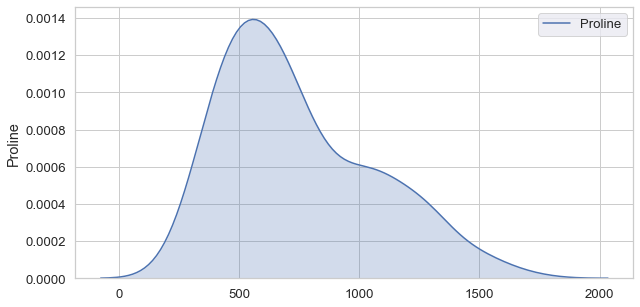

In [13]:

for i, col in enumerate(dataset.columns):
    sns.set_style('whitegrid')
    plt.figure(i)
    fig, ax =plt.subplots(figsize=(10,5))
    sns.set(font_scale = 1.2)
    sns.kdeplot(dataset[col], shade=True)
    plt.ylabel(col)
    plt.show()
    

***

# Step 4 : Dataset separation, Data Satndardization

In [14]:
# Indepedent Variable dataset.

x = dataset.drop(['Type'], axis=1)
x.head()

Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0    14.23   1.71  2.43        15.6        127     2.80        3.06   
1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2    13.16   2.36  2.67        18.6        101     2.80        3.24   
3    14.37   1.95  2.50        16.8        113     3.85        3.49   
4    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735

In [55]:
# Dependent variable.

y = pd.DataFrame(dataset['Type'],columns=['Type'])

In [56]:
y.head()

Type
0     1
1     1
2     1
3     1
4     1

In [17]:
# Data standardization.

from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x = std.fit_transform(x)

# Step 5: Principle Component Analysis.

* Let's see how much we can reduce the dimensions while still keeping 95% variance. We will apply Principle Component Analysis (PCA) to independent dataset (x). The reason for this is that by keeping a large number of dimensions with PCA, you don’t destroy much of the information, but hopefully will remove some noise/outliers from the data, and make the clustering problem easier for k-means. 

Note that pca_com will only be used for k-means, t-SNE will still use the original feature X.

In [18]:
from sklearn.decomposition import PCA
pca = PCA(random_state=42, n_components=0.95)                  # n_Componets = 0.95 use hyperparameter..which gives PCA contains 95% variance
pca_com = pca.fit_transform(x)                                 # we will use pca_com for k means 
pca_com.shape

(178, 10)

In [19]:
print(pca.singular_values_)

[28.94203422 21.08225141 16.04371561 12.78973645 12.32374195 10.68713954
  9.90368818  7.8760733   7.17081793  6.6828618 ]


In [20]:
variance_ratio = pca.explained_variance_ratio_
print('explained_variance_ratio:')
print((variance_ratio)*100)

# This provides informatin that PCA1 has variance 36.19%, PCA2 has 19.20%, PCA3 has 11.12%,....,etc

explained_variance_ratio:
[36.1988481  19.20749026 11.12363054  7.06903018  6.56329368  4.93582332
  4.23867932  2.68074895  2.2221534   1.93001909]


In [21]:
# Cummulative variance ratio..

# this will give an idea of, at how many no. of PCAs, the cummulative addition of variance will give much information..

cum_variance = np.cumsum(variance_ratio)
cum_variance

array([0.36198848, 0.55406338, 0.66529969, 0.73598999, 0.80162293,
       0.85098116, 0.89336795, 0.92017544, 0.94239698, 0.96169717])

 ### Creating PCA Dataframe..

In [22]:
df_PCA = pd.DataFrame(data=pca_com, columns=['PC1','PC2','PC3', 'PC4','PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])
df_PCA['Type'] = dataset['Type'] 
df_PCA 

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0    3.316751 -1.443463 -0.165739 -0.215631  0.693043 -0.223880  0.596427   
1    2.209465  0.333393 -2.026457 -0.291358 -0.257655 -0.927120  0.053776   
2    2.516740 -1.031151  0.982819  0.724902 -0.251033  0.549276  0.424205   
3    3.757066 -2.756372 -0.176192  0.567983 -0.311842  0.114431 -0.383337   
4    1.008908 -0.869831  2.026688 -0.409766  0.298458 -0.406520  0.444074   
..        ...       ...       ...       ...       ...       ...       ...   
173 -3.370524 -2.216289 -0.342570  1.058527 -0.574164 -1.108788  0.958416   
174 -2.601956 -1.757229  0.207581  0.349496  0.255063 -0.026465  0.146894   
175 -2.677839 -2.760899 -0.940942  0.312035  1.271355  0.273068  0.679235   
176 -2.387017 -2.297347 -0.550696 -0.688285  0.813955  1.178783  0.633975   
177 -3.208758 -2.768920  1.013914  0.596903 -0.895193  0.296092  0.005741   

          PC8       PC9      PC10  Type  
0    0.065139  0.641443  1.020956     1  
1    1.024416 -0.308847  0.159701     1  
2   -0.344216 -1.177834  0.113361     1  
3    0.643593  0.052544  0.239413     1  
4    0.416700  0.326819 -0.078366     1  
..        ...       ...       ...   ...  
173 -0.146097 -0.022498 -0.304117     3  
174 -0.552427 -0.097969 -0.206061     3  
175  0.047024  0.001222 -0.247997     3  
176  0.390829  0.057448  0.491490     3  
177 -0.292914  0.741660 -0.117969     3  

[178 rows x 11 columns]

 ### Visualizing... Understanding what we did exactly

In [27]:
import plotly.express as px

labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    pca_com,
    labels=labels,
    dimensions=range(4),
    color=dataset["Type"]
)
fig.update_traces(diagonal_visible=True)
fig.show()

In [34]:
total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    pca_com, x=0, y=1, z=2, color=dataset["Type"],
    title=f'Total Explained Variance: {total_var:.2f}%'
)
fig.show()

 ### UInderstanding Concept..Selecting max. number of PCA components

THis is the long way to clear concept..instead of doing this you may directly by using PCA hyperparameter n_componets =0.95

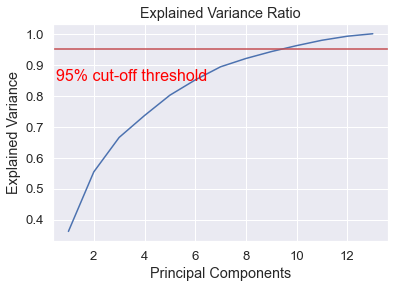

In [33]:
pca_Selection = PCA(random_state=42)
pca_example = pca_Selection.fit_transform(x)


plt.plot(np.arange(1, 14, step=1), np.cumsum(pca_Selection.explained_variance_ratio_))
plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)
plt.ylabel('Explained Variance')
plt.xlabel('Principal Components')
plt.title('Explained Variance Ratio')
plt.show()

****

# K-means clustering:

 ### How many clusters?
To find the best k value for k-means we'll look at the distortion at different k values. Distortion computes the sum of squared distances from each point to its assigned center. When distortion is plotted against k there will be a k value after which decreases in distortion are minimal. This is the desired number of clusters.



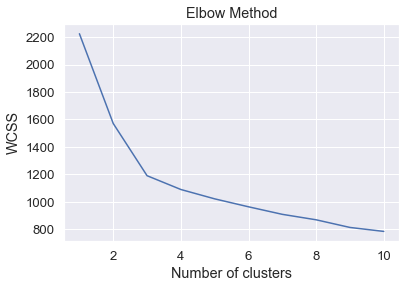

In [49]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(pca_com)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

 ## Selecting the number of clusters with silhouette analysis on KMeans clustering

In [59]:
y.Type.unique()

array([1, 2, 3], dtype=int64)

In [92]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

n_clusters = [2,3,4,5,6]

for n_clusters in n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(pca_com)
    silhouette_avg = silhouette_score(pca_com, cluster_labels)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.26967763793560773
For n_clusters = 3 The average silhouette_score is : 0.29867482943692875
For n_clusters = 4 The average silhouette_score is : 0.2677009093649607
For n_clusters = 5 The average silhouette_score is : 0.23637215393225694
For n_clusters = 6 The average silhouette_score is : 0.20774156816572462
